<a href="https://colab.research.google.com/github/dr-bach/python/blob/main/nobel_price_physics_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hopfield Network

<Figure size 200x200 with 0 Axes>

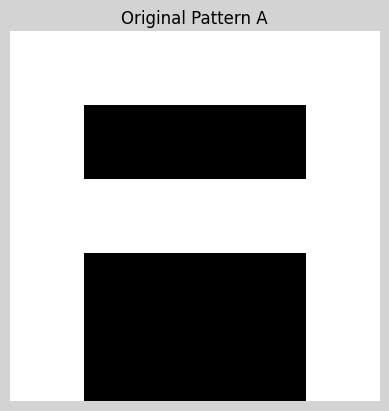

<Figure size 200x200 with 0 Axes>

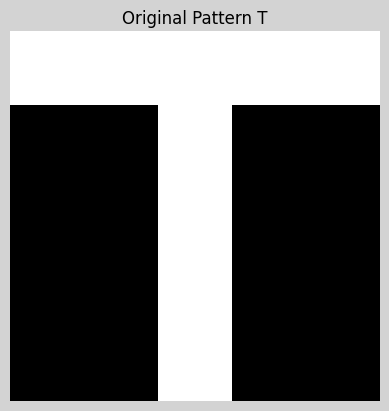

<Figure size 200x200 with 0 Axes>

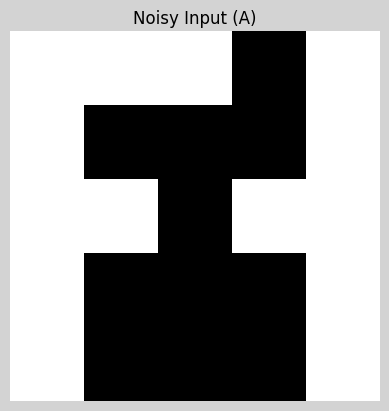

<Figure size 200x200 with 0 Axes>

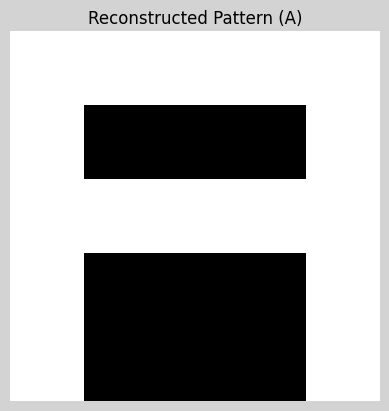

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, size):
        # Initialize the network size and weights
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        # Train the network using the provided patterns
        for p in patterns:
            p = p.reshape(self.size, 1)
            self.weights += p @ p.T
        np.fill_diagonal(self.weights, 0)
        self.weights /= len(patterns)

    def predict(self, pattern, steps=5):
        # Predict the output for a given input pattern
        pattern = pattern.copy()
        for _ in range(steps):
            for i in range(self.size):
                net_input = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if net_input >= 0 else -1
        return pattern

def plot_pattern(pattern, title):
    # Plot the pattern using Matplotlib
    plt.figure(figsize=(2, 2))
    plt.figure(facecolor='lightgray')
    plt.imshow(pattern.reshape((5, 5)), cmap='gray', vmin=-1, vmax=1, interpolation='nearest',
               extent=(0, 5, 0, 5))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example patterns (letters A and T in 5x5 grid)
A = np.array([
    1, 1, 1, 1, 1,
    1, -1, -1, -1, 1,
    1, 1, 1, 1, 1,
    1, -1, -1, -1, 1,
    1, -1, -1, -1, 1
])
T = np.array([
    1, 1, 1, 1, 1,
    -1, -1, 1, -1, -1,
    -1, -1, 1, -1, -1,
    -1, -1, 1, -1, -1,
    -1, -1, 1, -1, -1
])

# Initialize the Hopfield network
network = HopfieldNetwork(size=25)
network.train([A, T])

# Noisy input (A with some errors)
noisy_A = np.array([
    1, 1, 1, -1, 1,
    1, -1, -1, -1, 1,
    1, 1, -1, 1, 1,
    1, -1, -1, -1, 1,
    1, -1, -1, -1, 1
])

# Reconstruct the pattern
reconstructed = network.predict(noisy_A)

# Visualize the patterns
plot_pattern(A, "Original Pattern A")
plot_pattern(T, "Original Pattern T")
plot_pattern(noisy_A, "Noisy Input (A)")
plot_pattern(reconstructed, "Reconstructed Pattern (A)")

**Detailed Explanation for Example 1: Hopfield Network**

The HopfieldNetwork Class

First, we need two fundamental Python libraries:
- NumPy: For numerical computations and matrix handling.
- Matplotlib: For visualizing the patterns.

The core component of our project is the HopfieldNetwork class, which contains methods for training the network and predicting patterns.


Network Initialization

```
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))
```

- size: The number of neurons in the network. In our case, we are using a 5x5 grid, so size=25.
- weights: The weight matrix that represents the connections between neurons.

Initially, all weights are set to zero.

Training the Network
```
def train(self, patterns):
    for p in patterns:
        p = p.reshape(self.size, 1)
        self.weights += p @ p.T
    np.fill_diagonal(self.weights, 0)
    self.weights /= len(patterns)
```

- patterns: A list of patterns the network should learn.
- p.reshape(self.size, 1): Each pattern is reshaped into a column vector.
- self.weights += p @ p.T: Hebbian learning – the weight matrix is updated by adding the outer product of each pattern.
- np.fill_diagonal(self.weights, 0): The diagonal of the weight matrix is set to zero because neurons should not be connected to themselves.
- self.weights /= len(patterns): The weight matrix is normalized by the number of patterns.

Predicting (Reconstructing) Patterns
```
def predict(self, pattern, steps=5):
    pattern = pattern.copy()
    for _ in range(steps):
        for i in range(self.size):
            net_input = np.dot(self.weights[i], pattern)
            pattern[i] = 1 if net_input >= 0 else -1
    return pattern
```
- pattern: The input pattern that is to be reconstructed.
- steps: The number of iterations the network goes through to stabilize the pattern.
- net_input: The sum of weighted inputs for the i-th neuron.
- pattern[i]: The i-th neuron is set to 1 or -1 based on the net input.


Visualizing the Patterns
To better understand the patterns, we create a function to visualize them:
```
def plot_pattern(pattern, title):
    plt.figure(figsize=(2, 2))
    plt.figure(facecolor='lightgray')
    plt.imshow(pattern.reshape((5, 5)), cmap='gray', vmin=-1, vmax=1, interpolation='nearest',
               extent=(0, 5, 0, 5))
    plt.title(title)
    plt.axis('off')
    plt.show()
```

- pattern.reshape((5, 5)): The 1D pattern is reshaped into a 5x5 grid.
- cmap='gray': The pattern is displayed in grayscale.
- vmin=-1, vmax=1: Value ranges for the display (-1 as black, 1 as white).
- interpolation='nearest': No intermediate pixels, so individual points are clearly visible.
- plt.title(title): Adds a title to the plot.
- plt.axis('off'): The axes are hidden to highlight the pattern.

Example Patterns: Letters A and T
We define two patterns for the letters A and T in a 5x5 grid. Each entry in the array represents a pixel: 1 for white and -1 for black.
```
A = np.array([
    1, 1, 1, 1, 1,
    1, -1, -1, -1, 1,
    1, 1, 1, 1, 1,
    1, -1, -1, -1, 1,
    1, -1, -1, -1, 1
])

T = np.array([
    1, 1, 1, 1, 1,
    -1, -1, 1, -1, -1,
    -1, -1, 1, -1, -1,
    -1, -1, 1, -1, -1,
    -1, -1, 1, -1, -1
])
```

Training the Network
Next, we initialize the Hopfield network and train it with the A and T patterns.
```
# Network initialization
network = HopfieldNetwork(size=25)
network.train([A, T])
```

- size=25: Since each pattern consists of 25 pixels (5x5).
- network.train([A, T]): The network learns the A and T patterns.

Reconstructing a Noisy Pattern
To demonstrate the network’s ability to recognize patterns, we use a noisy version of A where some pixels are incorrect.
```
# Noisy input (A with some errors)
noisy_A = np.array([
    1, 1, 1, -1, 1,
    1, -1, -1, -1, 1,
    1, 1, -1, 1, 1,
    1, -1, -1, -1, 1,
    1, -1, -1, -1, 1
])
```

For example, the third pixel in the third row has been set to -1 to distort the pattern.

Reconstructing the Pattern
The network attempts to reconstruct the original A pattern from the noisy input.
```
# Reconstructing the pattern
reconstructed = network.predict(noisy_A)
```

Visualizing the Results
Finally, we visualize the original patterns, the noisy input, and the reconstructed pattern.
```
# Visualizing the patterns
plot_pattern(A, "Original Pattern A")
plot_pattern(T, "Original Pattern T")
plot_pattern(noisy_A, "Noisy Input (A)")
plot_pattern(reconstructed, "Reconstructed Pattern (A)")
```
Results
- Original Pattern A: The clearly defined pattern of the letter A.
- Original Pattern T: The clearly defined pattern of the letter T.
- Noisy Input (A): A distorted version of A with some incorrect pixels.
- Reconstructed Pattern (A): The pattern reconstructed by the Hopfield network, which tries to correct the errors and recover the original A.

# Geoffrey Hinton - Boltzmann Machine

scikit-learn version: 1.5.2
[BernoulliRBM] Iteration 1, pseudo-likelihood = -24.53, time = 0.02s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -24.57, time = 0.06s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -23.51, time = 0.06s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -22.00, time = 0.06s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -20.99, time = 0.05s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.21, time = 0.06s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.67, time = 0.05s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -19.53, time = 0.07s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -19.36, time = 0.06s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -19.00, time = 0.07s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -19.66, time = 0.06s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -18.25, time = 0.08s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -19.61, time = 0.06s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -17.41, time = 0.05s
[

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


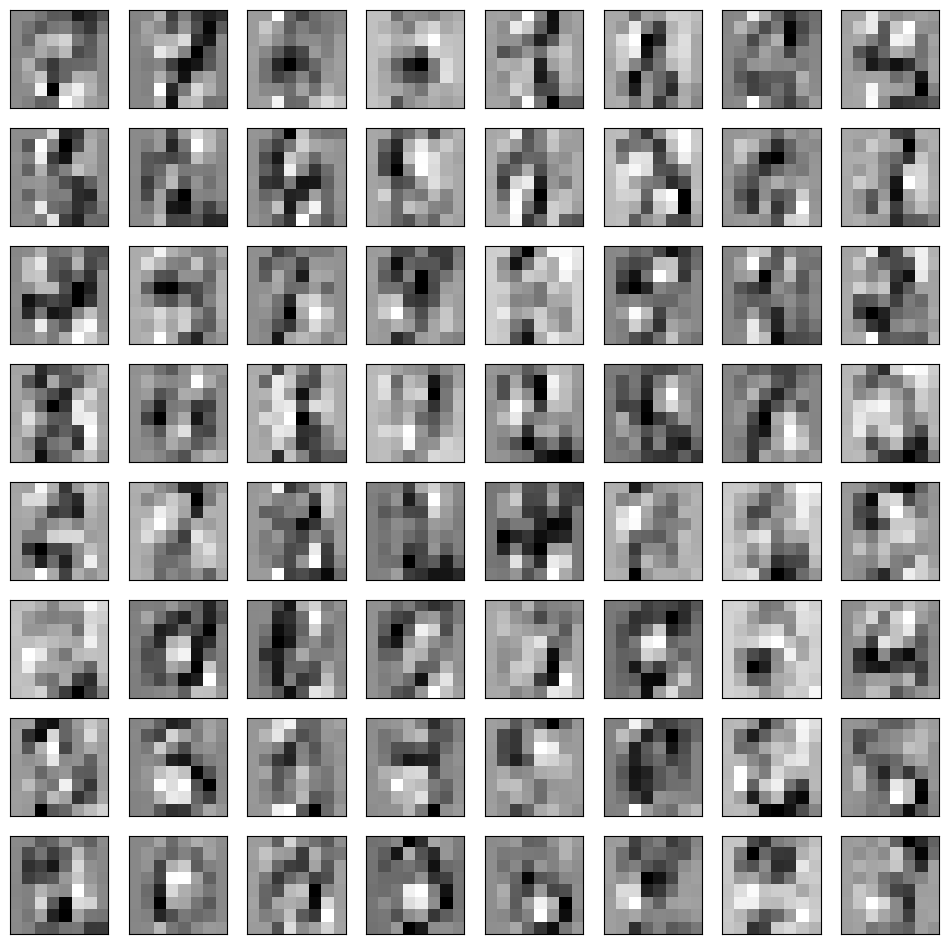

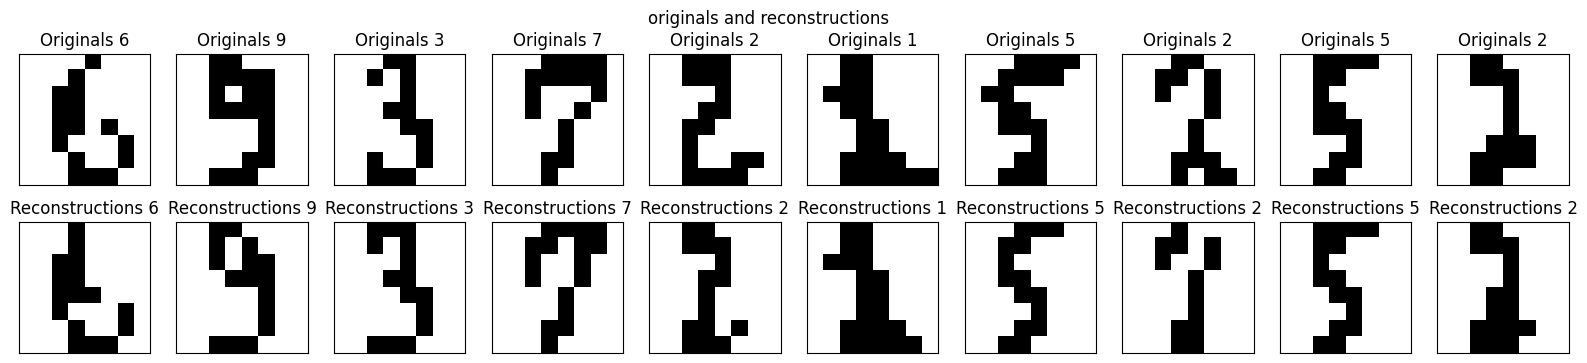

In [ ]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.datasets import load_digits
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Check scikit-learn version
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Normalize and binarize the data
X = X / 16.0  # Max pixel value in the digits dataset is 16
X_binarized = binarize(X, threshold=0.5)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_binarized, y, test_size=0.2, random_state=42)

# Initialize RBM with more iterations
rbm = BernoulliRBM(n_components=64, learning_rate=0.05, batch_size=10, n_iter=30, random_state=0, verbose=True)

# Initialize logistic classifier
logistic = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')

# Create a pipeline
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

# Train the pipeline
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification accuracy: {accuracy * 100:.2f}%')

# Visualize the learned weights
plt.figure(figsize=(12, 12))
for i, comp in enumerate(rbm.components_[:64]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap='gray_r')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Learned Weights of the RBM (64 hidden neurons)')
plt.show()

# Reconstruct some test images
def reconstruct(rbm, X):
    # Get hidden activations
    hidden = rbm.transform(X)
    # Reconstruct the visible units
    reconstructed = np.dot(hidden, rbm.components_)
    # Optionally binarize the reconstruction
    reconstructed = binarize(reconstructed, threshold=0.5)
    return reconstructed

reconstructed = reconstruct(rbm, X_test[:10])

# Visualize originals and reconstructions
plt.figure(figsize=(20, 4))
for i in range(10):
    # Original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape((8, 8)), cmap='gray_r')
    plt.title(f'Originals {y_test[i]}')
    plt.xticks(())
    plt.yticks(())

    # Reconstruiertes Bild
    plt.subplot(2, 10, i + 11)
    plt.imshow(reconstructed[i].reshape((8, 8)), cmap='gray_r')
    plt.title(f'Reconstructions {y_test[i]}')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('originals and reconstructions')
plt.show()

**Detailed explanations of Example 2: Boltzmann Machine**

Importing the necessary libraries
```
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.datasets import load_digits
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')
```

Here, various libraries are imported:
- numpy: For numerical computations.
- BernoulliRBM: A special type of RBM for binary data.
- load_digits: For loading the handwritten digit dataset.
- binarize: For binarizing the data.
- matplotlib.pyplot: For visualizing data and results.
- Pipeline: For creating a processing pipeline with multiple steps.
- LogisticRegression: For classifying the digits.
- train_test_split: To split the data into training and test sets.
- accuracy_score: For calculating the model’s accuracy.

The last part prints the current version of scikit-learn. This is useful to ensure that the code is executed with the correct version of the library, as functions and parameters may change between versions.

Loading and preparing the data
```
# Loading the datasets
digits = load_digits()
X = digits.data
y = digits.target

# Normalizing and binarizing the data
X = X / 16.0  # The maximum pixel value in the digits dataset is 16
X_binarized = binarize(X, threshold=0.5)

# Splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_binarized, y, test_size=0.2, random_state=42
```

Here, the digits dataset is loaded, which contains handwritten digits from 0 to 9. X contains the features (pixel values of the images), and y contains the target values (the actual digits).

The pixel values range from 0 to 16. By dividing X by 16.0, the values are normalized to a range from 0 to 1. Binarization is then performed, where all values above 0.5 are set to 1, and the rest are set to 0. This is particularly important for the BernoulliRBM, which expects binary inputs.

The data is split into training and test sets. 80% of the data is used for training and 20% for testing. The random_state ensures that the split is reproducible. If you don’t understand the value 42, you should read Douglas Adams.

Creating and training the model
```
# Initializing the RBM with more iterations
rbm = BernoulliRBM(n_components=64, learning_rate=0.05, batch_size=10, n_iter=30, random_state=0, verbose=True)

# Initializing the classifier
logistic = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')

# Creating a pipeline
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

# Training the pipeline
classifier.fit(X_train, y_train)
```
Here, a BernoulliRBM is first created with the following parameters:
- n_components=64: Number of hidden neurons.
- learning_rate=0.05: Learning rate for training.
- batch_size=10: Number of samples per batch.
- n_iter=30: Number of training epochs.
- random_state=0: For reproducibility.
- verbose=True: Enables detailed output during training.
Then, a logistic regression classifier is created:
- max_iter=1000: Maximum number of iterations for the solver.
- solver='lbfgs': Optimization algorithm.
- multi_class='auto': Automatic selection of the multi-class strategy.
A pipeline is created that includes two steps, which is then trained.
- RBM: Transforms the input data into a new representation.
- Logistic Regression: Classifies the transformed data.
The pipeline trains the RBM to learn a new representation of the data, and then logistic regression is trained on this new data.

Evaluating model performance
```
# Making predictions on the test data
y_pred = classifier.predict(X_test)
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification accuracy: {accuracy * 100:.2f}%')
The trained model is used to make predictions on the test data. The accuracy of the model is then calculated by comparing the predicted values with the actual test values. The accuracy is displayed as a percentage.
Visualizing the learned weights
# Transforming the data through the RBM
X_transformed = rbm.transform(X_binarized)
# Visualizing the learned weights
plt.figure(figsize=(12, 12))
for i, comp in enumerate(rbm.components_[:64]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap='gray_r')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Learned Weights of the RBM (64 Hidden Neurons)')
plt.show()
```

This section visualizes the weights learned by the RBM:
- Transforming the data: The entire binarized dataset is transformed by the RBM.
- Visualization: The first 64 components (weights) of the RBM are displayed as 8x8 images. Each component corresponds to a hidden neuron and represents a pattern that the neuron detects.

Reconstruction and display of test images
```
# Reconstructing some test images
def reconstruct(rbm, X):
    # Activations of hidden neurons
    hidden = rbm.transform(X)
    # Reconstructing the visible neurons
    reconstructed = np.dot(hidden, rbm.components_)
    # Optional: Applying a threshold for binarization
    reconstructed = binarize(reconstructed, threshold=0.5)
    return reconstructed
reconstructed = reconstruct(rbm, X_test[:10])

# Displaying the original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(10):
    # Original image
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape((8, 8)), cmap='gray_r')
    plt.title(f'Original {y_test[i]}')
    plt.xticks(())
    plt.yticks(())
    
    # Reconstructed image
    plt.subplot(2, 10, i + 11)
    plt.imshow(reconstructed[i].reshape((8, 8)), cmap='gray_r')
    plt.title(f'Reconstr. {y_test[i]}')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Original and Reconstructed Images')
plt.show()
```

This function takes the RBM and some input data X, and reconstructs the visible neurons (the original pixel values):
- Activations of hidden neurons: The input data is transformed by the RBM.
- Reconstruction: The hidden representations are multiplied by the RBM’s weights to obtain the reconstructed visible neurons.
- Binarization: The reconstructed values are binarized to produce a clearer image.
Next, the first 10 test images are reconstructed, and both the original images and their corresponding reconstructed versions are displayed side by side:
- Original images: The actual test images are shown in the first row.
- Reconstructed images: The images reconstructed by the RBM are shown in the second row.
- Titles: Each image title displays the digit represented by the image.
